In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Load csv
df = pd.read_csv('/Users/davidkim/Downloads/data_jobs.csv')

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills)
    if pd.notnull(skills) else skills)

In [28]:
#Filter for jobs in the US
df_US = df[df['job_country'] == 'United States'].dropna(subset='salary_year_avg').copy()

In [29]:
#Get top 6 most popular Data jobs in the US
job_titles = df_US['job_title_short'].value_counts().index[:6].to_list()


In [30]:
#Filter US jobs DataFrame to only have top 6 Data jobs
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]
df_US_top6.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."


In [31]:
#Find ordering of descending median annual salary for jobs
job_order = df_US_top6.groupby(by='job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

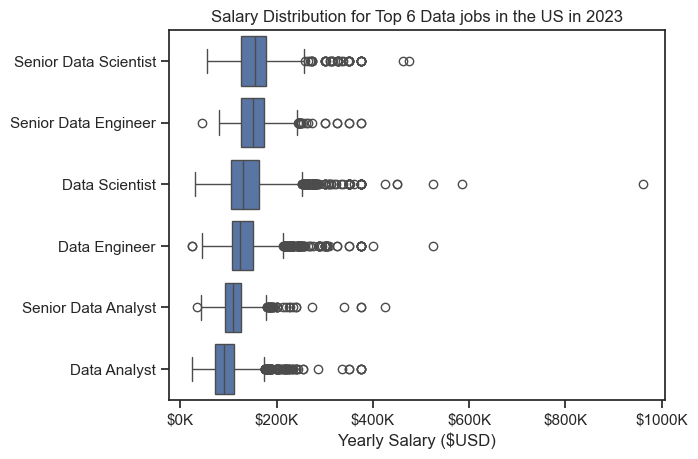

In [32]:
#Create plot
sns.set_theme(style='ticks')

#Visualize plot
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order = job_order)

#Label plot
plt.title('Salary Distribution for Top 6 Data jobs in the US in 2023')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

In [33]:
#Find ordering of descending median annual salary for jobs
df_US_top6.groupby(by='job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

job_title_short
Senior Data Scientist    155000.0
Senior Data Engineer     150000.0
Data Scientist           130000.0
Data Engineer            125000.0
Senior Data Analyst      110000.0
Data Analyst              90000.0
Name: salary_year_avg, dtype: float64

In [34]:
#Filter for Data Scientist jobs in the US
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

In [35]:
#Expand (explode) the job_skills column
df_DS_US = df_DS_US.explode('job_skills')

In [57]:
#Get top 10 highest paid skills
df_DS_US_top_paid_skills = df_DS_US.groupby(by='job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
).sort_values(by='median_salary', ascending=False).head(10)
df_DS_US_top_paid_skills

,skill_count,median_salary
job_skills,,
asana,43,259000.00000
airtable,42,224250.00000
watson,113,213500.00000
unreal,22,211500.00000
ruby on rails,17,195500.00000
redhat,13,189500.00000
notion,108,187500.00000
slack,172,180000.00000
hugging face,202,179000.00000


In [58]:
#Get top 10 most popular skills
df_DS_US_top_popular_skills = df_DS_US.groupby(by='job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
).sort_values(by='skill_count', ascending=False).head(10).sort_values('median_salary', ascending=False)
df_DS_US_top_popular_skills

,skill_count,median_salary
job_skills,,
tensorflow,7039,149646.0
spark,9890,135959.5
sql,30034,134500.0
aws,10288,134000.0
python,42379,131867.0
r,26022,126000.0
azure,6878,126000.0
tableau,13859,125000.0
java,7335,125000.0


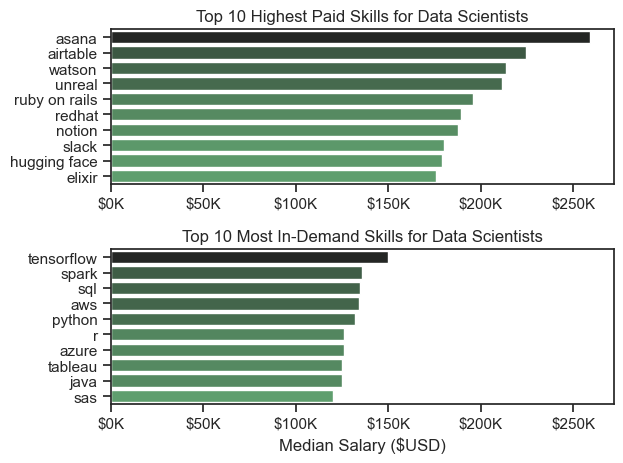

In [60]:
#Create plot
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

#Visualize plot
sns.barplot(data=df_DS_US_top_paid_skills, x='median_salary', y=df_DS_US_top_paid_skills.index, hue='median_salary', ax=ax[0], palette='dark:g_r')
sns.barplot(data=df_DS_US_top_popular_skills, x='median_salary', y=df_DS_US_top_popular_skills.index, hue='median_salary', ax=ax[1], palette='dark:g_r')

#Label plot
ax[0].set_title('Top 10 Highest Paid Skills for Data Scientists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Scientists')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim()) # Set the same x-axis as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

plt.tight_layout()
plt.show()